# Vetorized gradient descent (Linear Regression)

### 1. 가중치가 여러개로 이루어진 식을 Gradient descent로 업데이트 해봅시다

In [13]:
# 단순 선형 회귀를 위한 임의의 데이터셋을 생성합니다.
seed = 1215
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=2000, n_features=5, random_state=seed, n_informative = 5, noise = 3.0)

X_train = X[:1600]
X_test = X[1600:]
y_train = y[:1600]
y_test = y[1600:]

### 1-1. 다음과 같은 산점도를 그려보세요

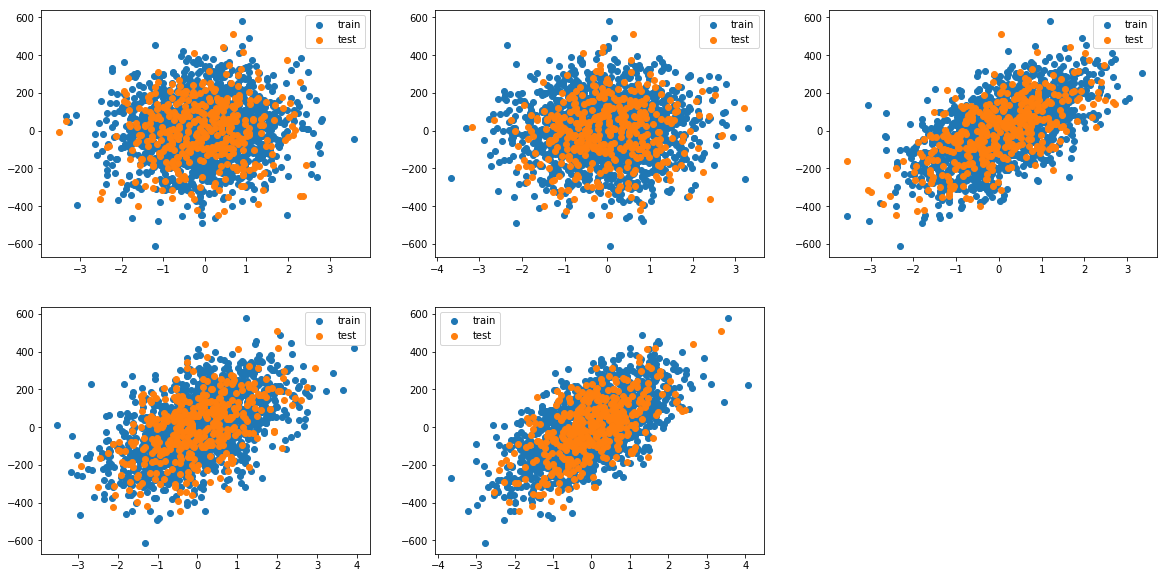

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
# Your Code Here
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.scatter(X_train[:,i], y_train)
    plt.scatter(X_test[:,i], y_test)
    plt.legend(["train", "test"])
plt.show()

### 1-2. h(x) = ax1+bx2+cx3+dx4+ex5라는 식을 만들어 Gradient Descent를 이용해 mse를 최소화하는 a를 찾아보세요

In [31]:
import numpy as np
def h(theta,X):
    return np.dot(X,theta)

In [76]:
np.ones(2) @ np.array([3,2])

5.0

In [122]:
iterations = 10000
learningrate = 0.001
y_test = y_test.reshape(400,1)

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    y = y.reshape(-1,1)
    for meaningless in range(iterations):
        # Your Code Here 
        # **********각 theta의 업데이트는 동시에 이루어져야 합니다 **********#
        # cost = np.sum(np.power(((X @ theta.T)-y),2)) / (2 * len(X))
        theta -= (learningrate/len(X)) * np.sum(X * (X @ theta.reshape(-1,1) - y), axis=0)
        
        ######################################################################
        
    y_pred = h(theta,X_test)
    r_square = r2_score(y_test, y_pred)    
    
    return print('Optimal "a" is:', theta, '\n', 'R^2 :', r_square)

In [123]:
from sklearn.metrics import mean_squared_error, r2_score

Gradientdescent(X_train,y_train, np.array([0.01,0.01,0.01,0.01,0.01]))

Optimal "a" is: [12.00592427  4.97291451 95.98025058 77.67198928 99.75892508] 
 R^2 : 0.9996241655587669


### 1.3 잘 찾았는지 Linear Regression의 coefficient(theta)와 비교해봅시다

In [124]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# optimal a,b based on OLS
print("y = %.4fX1 + %.4fX2 + %.4fX3 + %.4fX4 + %.4fX5 + %.4f"%
      (float(model.coef_[0]),float(model.coef_[1]), float(model.coef_[2]), float(model.coef_[3]), 
       float(model.coef_[4]),float(model.intercept_)))

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# r2_score
r_square = r2_score(y_test, y_pred)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)

# OLS 방식으로 찾아낸 coefficient값과 매우 유사합니다
# 우리가 찾은 모델의 R^2 값이 0.0000005 정도 높습니다

y = 12.0081X1 + 4.9736X2 + 95.9852X3 + 77.6710X4 + 99.7633X5 + 0.0374
Mean Squared Error : 10.095756191029535
R^2 : 0.9996237342985043


### 1.4 test set에서 왜 오차 제곱합을 최소화하는 선형식보다 gradient descent로 찾은 선형식이 설명력이 높을까요? 그 이유를 설명해주세요

In [198]:
# Your Answer Here
# OLS 식이 성립하기 위한 데이터의 조건이 더 까다롭기 때문 아닐까요.
# outlier가 있울 경우.... 아웃라이어 제거한 다음 비교하면 R^2에서 OLS가 더 값이 크다.

### 1.5 위 경우가 항상 가능한가요?(True/False) 를 고르고 그 이유를 설명해주세요

In [199]:
# Your Answer Here
# false일 듯. OLS는 Mean squared Error인 loss function만 쓸 수 있고 gradient descent는 다른 형태의 loss function도 사용 가능한데,
# mse loss function인 ols가 gradient descent의 loss function보다 더 설명력이 좋은 loss function일 수 있다.

### 2. Linear Regression with L1,L2 regularization

![img](https://i2.wp.com/laid.delanover.com/wp-content/uploads/2018/01/reg_formulas.png?w=550)

In [126]:
# 기존의 Loss는 다음과 같습니다
def MSE(mytheta,X,y):
    return float((1./(len(X)*2)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

### 2-1. L1 reg term을 추가한 MSE 함수를 작성해주세요

In [125]:
def MSE(mytheta,X,y,lambdaa):
    # Your Code Here
    return float((1./(len(X)*2)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)) + lambdaa*np.sum(abs(mytheta)))

### 2-2. 1-2에서 작성한 Gradientdescent 함수를 이용해 L1 reg term이 추가된 함수를 작성해주세요(람다=0.01)

In [149]:
iterations = 10000
learningrate = 0.001
lambdaa = 0.01
y_test = y_test.reshape(400,1)

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    y = y.reshape(-1,1)
    for meaningless in range(iterations):
        # Your Code Here 
        # ********** 각 theta의 업데이트는 동시에 이루어져야 합니다 **********#
        # 한줄로 짜도 되고 4줄로 짜도 됩니다 뭐가 깔끔한지는 잘 모르겠네요 !
        
        theta -= (learningrate/len(X)) * (np.sum(X * (X @ theta.reshape(-1,1) - y), axis=0))
        theta -= ((learningrate * lambdaa) / len(X))
        # lasso Loss function의 미분식이 뭔지 모르겠음
        
        #######################################################################
        
    y_pred = h(theta,X_test)
    r_square = r2_score(y_test, y_pred)    
    
    return print('Optimal "a" is:', theta, '\n', 'R^2 :', r_square)

In [150]:
Gradientdescent(X_train,y_train, np.array([0.01,0.01,0.01,0.01,0.01]))

Optimal "a" is: [12.00591815  4.97290888 95.98024427 77.67198397 99.75891881] 
 R^2 : 0.9996241654679483


In [204]:
iterations = 10000
learningrate = 0.001
lambdaa = 0.01
y_test = y_test.reshape(400,1)

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    y = y.reshape(-1,1)    
    for meaningless in range(iterations):
        # Your Code Here 
        # ********** 각 theta의 업데이트는 동시에 이루어져야 합니다 **********#
        # 한줄로 짜도 되고 4줄로 짜도 됩니다 뭐가 깔끔한지는 잘 모르겠네요 !
        
        
        #######################################################################
        
    y_pred = h(theta,X_test)
    r_square = r2_score(y_test, y_pred)    
    
    return print('Optimal "a" is:', theta, '\n', 'R^2 :', r_square)

In [10]:
Gradientdescent(X_train,y_train, np.array([0.01,0.01,0.01,0.01,0.01]))

Optimal "a" is: [12.00676582  4.97269013 95.98600624 77.67241648 99.76260546] 
 R^2 : 0.9996242155635732


### 2-3. 이번에는 L2 reg term이 추가된 함수로 Gradient descent를 적용해 보세요

In [11]:
iterations = 10000
learningrate = 0.001
lambdaa = 0.01
y_test = y_test.reshape(400,1)


# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    
    for meaningless in range(iterations):
        # Your Code Here 
        # ********** 각 theta의 업데이트는 동시에 이루어져야 합니다 **********
        # 한줄로 짜도 되고 4줄로 짜도 됩니다 뭐가 깔끔한지는 잘 모르겠네요 !
        error = np.zeros(5)
                
        for i in range(len(theta)):
            error[i] = (1/len(X)*2)*np.sum((h(theta,X)-y)*X[:,i]) + 2*lambdaa*theta[i] 
                
        for i in range(len(theta)):
            theta[i] = theta[i] - learningrate*error[i]
        
    y_pred = h(theta,X_test)
    r_square = r2_score(y_test, y_pred)    
    
    return print('Optimal "a" is:', theta, '\n', 'R^2 :', r_square)

In [12]:
Gradientdescent(X_train,y_train, np.array([0.01,0.01,0.01,0.01,0.01]))

Optimal "a" is: [11.89261968  4.93526689 95.01306251 76.99449154 98.79860667] 
 R^2 : 0.9995116407526918


### 2-4. L1과 L2 regularization의 차이점을 gradient를 이용해 설명해보세요 왜 L1은 feature selection이 가능하고 L2는 그렇지 않은 걸까요?

In [ ]:
# Your Answer Here
# Lasso는 regularization을 위해 가중치에 절대값을 적용함. 따라서 정규화 과정을 통해 가중치를 0으로 만들 수 있다.
# Ridge는 가중치의 제곱값을 적용함. 따라서 정규화 결과로 가중치를 0에 근접하게 만들 수 있으나 0으로는 만들 수 없음
# 즉, 정규화를 통해 Lasso는 필요없는 변수를 '제거'하는 feature selection이 가능하지만
# Ridge는 정규화를 통해 필요없는 변수의 영향력을 0에 근접하도록 만드는 것.
# 
# 

### 3. Hyperparameter Search - Grid Search vs Random Search

In [151]:
import sklearn.datasets
seed = 1215
X, y = sklearn.datasets.make_classification(n_samples=3000, n_features=10, n_classes=3, n_informative = 7, random_state = seed)

In [154]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 전체 data set을 (training + validation), test으로 나눔
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=seed)

# (training + validation) set을 training, validation으로 나눔
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=seed)

print("size of training set: %d,  size of validation set: %d,  size of test set: %d" % (
        X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

size of training set: 1687,  size of validation set: 563,  size of test set: 750


### 3.1 SVM - grid search를 이용해 최적의 gamma와 C를 찾아봅시다 여기서 gamma와 C는 hyperparameter입니다.

In [156]:
# sklearn.svm.SVC의 argument에 대한 정보는 다음의 링크에서 찾아보세요
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# 기본적인 절차는 다음과 같습니다
# 우선 아주 큰 범위에서 gamma와 C의 조합을 탐색합니다 (ex.0.001~100)
# 특정 범위(ex.0.01~0.1)에서 best score를 달성할 경우 해당 범위에서 다시 grid search를 수행합니다.
# 이를 반복하며 best hyperparameter를 탐색합니다
best_score = 0

# search할 parameter를 임의(로 설정
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 대해 SVC 훈련    
        svm = SVC(gamma=gamma, C=C)
        
        # train set으로 model fitting
        svm.fit(X_train, y_train)
        
        # validation set으로 SVC 평가         
        score = svm.score(X_valid, y_valid) 
        
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {"C":C, "gamma":gamma}
            
print("최고 점수(모델 정확도):", best_score)
print("최적 매개변수:", best_parameters)       

최고 점수(모델 정확도): 0.9182948490230906
최적 매개변수: {'C': 100, 'gamma': 0.01}


### 3.2 SVM - ransom search를 이용해 최적의 gamma,C를 찾아봅시다

In [167]:
best_score = 0
import random
# search할 parameter를 임의(random)로 설정
for _ in range(100):
    gamma = np.random.rand()+0.01
    C = np.random.rand()
    # 매개변수 각 조합에 대해 SVC 훈련    
    svm = SVC(gamma=gamma, C=C)

    # train set으로 model fitting
    svm.fit(X_train, y_train)

    # validation set으로 SVC 평가         
    score = svm.score(X_valid, y_valid) 

    # 점수가 더 높으면 기록 
    if score > best_score:
        best_score = score
        best_parameters = {"C":C, "gamma":gamma}
print("최고 점수(모델 정확도):", best_score)
print("최적 매개변수:", best_parameters)       

최고 점수(모델 정확도): 0.9218472468916519
최적 매개변수: {'C': 0.6750324184607728, 'gamma': 0.06985250811322317}


### 3.3 100번의 탐색 기회를 이용해 Grid Search와 Random Search를 각각 수행해보고 최적의 hyperparameter 조합을 찾아보세요 !

In [17]:
# random search


최고 점수(모델 정확도): 0.9200710479573713
최적 매개변수: {'C': 156.86869463230545, 'gamma': 0.009282315617969206}


In [18]:
# grid search


최고 점수(모델 정확도): 0.9200710479573713
최적 매개변수: {'C': 170, 'gamma': 0.009}


### 3.4 다음의 그림을 참고하여 어떤 parameter search 방법이 더 좋은 것인지 설명해주세요

![img](https://i.stack.imgur.com/cIDuR.png)

In [ ]:
# Your Answer Here
# domain 지식이 있어 빠르게 parameter의 range를 설정할 수 있으면 grid search가,
# 그렇지 않다면 random search를 선택하는 편이 나을 것 같다.

# 고생하셨습니다 :)